## Day 26 Lecture 1 Assignment

In this assignment, we will learn about linear regression models and how to plot them using the sklearn library

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.calibration import calibration_curve

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [2]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')

In [3]:
lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [4]:
# answer below:
lager = lager.drop(columns=['beer'])

Next check the data to make sure there is no missing data. Remove rows containing missing data if it exists.

In [5]:
# answer below:
lager.isna().sum()*100/lager.isna().count()


tpc     0.0
ma      0.0
dsa     0.0
asa     0.0
orac    0.0
rp      0.0
mca     0.0
dtype: float64

Plot the scatter matrix for all variables in the dataset. Do all variables have a pairwise linear relationship?

[]

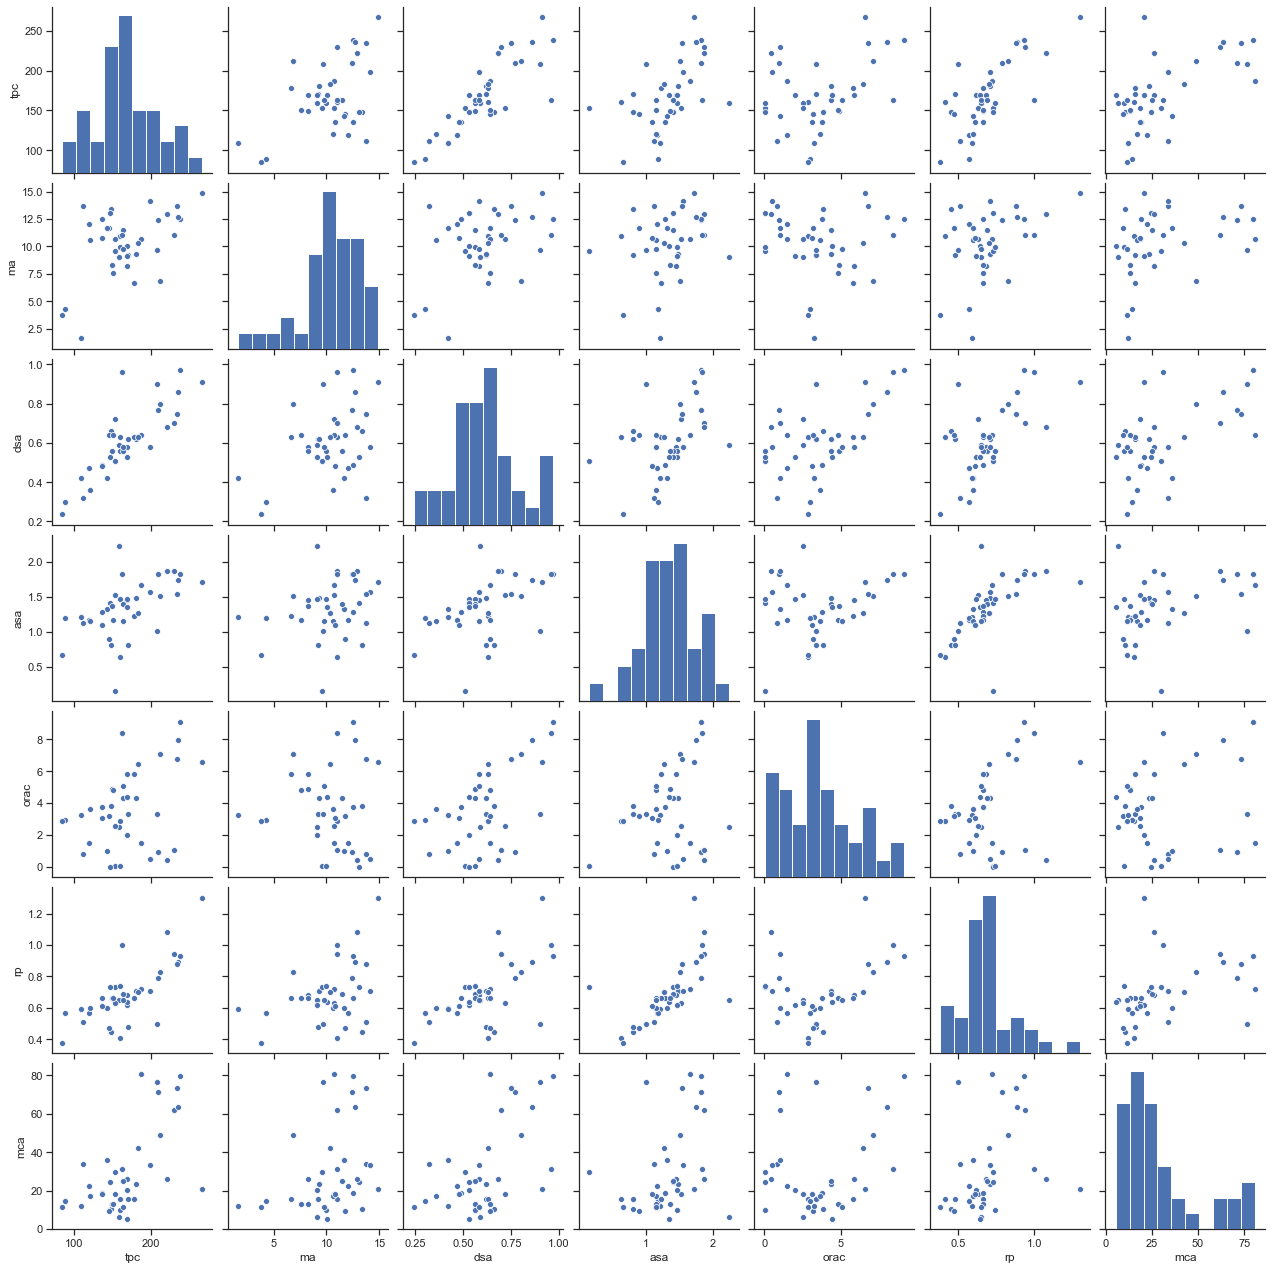

In [6]:
sns.set(style="ticks")

sns.pairplot(lager)
plt.plot()

In [7]:
# Not all have relationships
# tpc has lots of positive corr
# dsa and rp are very good predictors

In [8]:
lager.describe()

,tpc,ma,dsa,asa,orac,rp,mca
count,40.000000,40.000000,40.000000,40.00000,40.000000,40.00000,40.000000
mean,168.228250,10.302000,0.608500,1.33500,3.570500,0.69050,29.711500
std,41.744391,2.837392,0.171278,0.39813,2.435364,0.18439,22.204255
min,84.640000,1.640000,0.240000,0.16000,0.010000,0.38000,5.360000
25%,147.072500,9.200000,0.525000,1.15000,1.500000,0.59750,14.182500
50%,163.110000,10.710000,0.605000,1.35500,3.290000,0.66000,21.560000
75%,189.875000,12.417500,0.685000,1.54500,4.930000,0.73250,34.240000
max,267.270000,14.830000,0.970000,2.23000,9.120000,1.30000,80.890000


We would like to split the data into train and test samples. Use `tpc` as the y column and split the data with 25% of the data in the test sample.

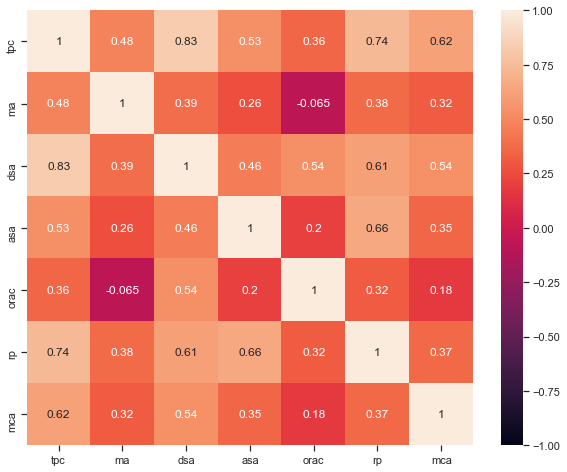

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(lager.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [10]:
# answer below:
X = lager.drop(columns=["tpc"])
y = lager["tpc"]

Using sklearn, train the model and print out the coefficients and intercept.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model.score(X_train, y_train)

0.7939987621454905

In [14]:
model.score(X_test, y_test)

0.8765286118348166

In [15]:
model.intercept_

25.22332551926172

In [16]:
coef_df = pd.DataFrame({"feat": X_train.columns, "coef": model.coef_[0]})
coef_df

,feat,coef
0,ma,1.463745
1,dsa,1.463745
2,asa,1.463745
3,orac,1.463745
4,rp,1.463745
5,mca,1.463745


In [17]:
# Formula
# ------------------------------------------------
# tpc = 25.2 + 1.5*ma + 110.7*dsa + 0.6*asa + -1.3*orac + rp*78.4 + 0.4*mca


# Interpretations
# ------------------------------------------------
# Intercept:
#  *  if all variables were 0, we'd predict 25.2 as the tpc

# Coefficiets:
#  * Holding everything else constant, for every 1 unit increase in dsa, we expect to see a 110.7 increase in tpc
#  * Holding everything else constant, for every 1 unit increase in rp, we expect to see a 78.4 increase in tpc
#  * Holding everything else constant, for every 1 unit increase in orac, we expect to see a 1.3 decrease in tpc

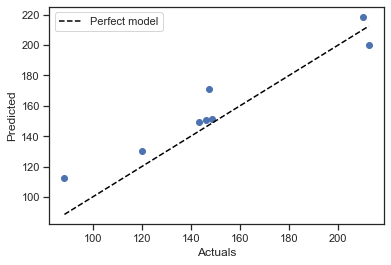

In [18]:
# Its always good to look not only at model scores, but how is you model making mistakes
y_pred = model.predict(X_test)

mn = y_test.min()
mx = y_test.max()

plt.scatter(y_test, y_pred)
plt.plot([mn, mx], [mn, mx], "--", label="Perfect model", c="black")
plt.xlabel("Actuals")
plt.ylabel("Predicted")
plt.legend()
plt.show()